## Extract Pages and Text for File PDF

In [3]:
import re
from pdfminer.high_level import extract_pages, extract_text

for page_layout in extract_pages('/content/BAB X [Membuat dan Memodifikasi Tabel].pdf'):
  for element in page_layout:
    print(element)

<LTTextBoxHorizontal(0) 69.168,770.650,95.253,782.530 'wow \n'>
<LTTextBoxHorizontal(1) 159.220,771.054,446.030,782.934 'DIKTAT MATA KULIAH SOFTWARE TERAPAN II \n'>
<LTTextBoxHorizontal(2) 154.540,712.724,451.225,762.404 'BAB  X \nMEMBUAT DAN MEMODIFIKASI TABEL \nPADA MS.ACCESS \n'>
<LTTextBoxHorizontal(3) 483.410,722.105,526.390,767.129 'IF \n'>
<LTTextBoxHorizontal(4) 63.768,675.326,165.340,688.286 'Pengertian Tabel \n'>
<LTTextBoxHorizontal(5) 99.792,646.370,540.683,658.250 'Tabel  bisa  dikatakan  sebagai  kumpulan  data  khusus,  seperti  data  mahasiswa,  data \n'>
<LTTextBoxHorizontal(6) 63.768,624.410,541.450,636.290 'pelanggan  dan  sebagainya.  Dengan  menggunakan  tabel  terpisah  untuk  masing-masing  topik \n'>
<LTTextBoxHorizontal(7) 63.768,602.450,540.750,614.330 'berarti  kita  sudah  melakukan  suatu  tindakan  yang  amat  berguna  bagi  database  sebab  dengan \n'>
<LTTextBoxHorizontal(8) 63.768,580.470,487.555,592.350 'demikian akan mengurangi beberapa kesalahan teru

### Extract Text File PDF

In [5]:
text = extract_text('/content/BAB X [Membuat dan Memodifikasi Tabel].pdf')
print(text)

wow 

DIKTAT MATA KULIAH SOFTWARE TERAPAN II 

BAB  X 
MEMBUAT DAN MEMODIFIKASI TABEL 
PADA MS.ACCESS 

IF 

Pengertian Tabel 

Tabel  bisa  dikatakan  sebagai  kumpulan  data  khusus,  seperti  data  mahasiswa,  data 

pelanggan  dan  sebagainya.  Dengan  menggunakan  tabel  terpisah  untuk  masing-masing  topik 

berarti  kita  sudah  melakukan  suatu  tindakan  yang  amat  berguna  bagi  database  sebab  dengan 

demikian akan mengurangi beberapa kesalahan terutama di dalam memasukkan data. 

Tabel  terdiri  dari  dua  bagian  utama  yaitu  Kolom  (bagian  yang  menurun)  atau  lebih 

dikenal  dengan  istilah  Field  dan  baris  (bagian  mendatar)  yang  disebut  Record.  Struktur  tabel 

pada  Access  2007  yamg  terdiri  dari  field-field  yang  mengelompokkan  data  ke  dalam  kelompok-

kelompok  yang  berjenis  sama.  Di  dalam  tabel  perlu  menentukan  jenis  dan  ukuran  yang 

dibutuhkan sesuai dengan besarnya data yang akan dimasukkan. 

Berikut  ini  adalah  jenis  data

In [6]:
pattern = re.compile(r'[a-zA-Z]+,{1}\s{1}') # regex
matches = pattern.findall(text)
print(matches)

['khusus, ', 'mahasiswa, ', 'huruf, ', 'angka, ', 'simbol, ', 'hari, ', 'tanggal, ', 'jam, ', 'keadaan, ', 'Setiawan, ', 'baru, ', 'dimunculkan, ', 'itu, ', 'Setiawan, ', 'Setiawan, ', 'Name, ', 'Properties, ', 'kolom, ', 'form, ', 'Setiawan, ', 'atas, ', 'baru, ', 'diinginkan, ', 'Setiawan, ', 'atas, ', 'field, ', 'field, ', 'diperbaiki, ', 'Setiawan, ', 'POS, ', 'Setiawan, ', 'JURUSAN, ', 'Text, ', 'Setiawan, ', 'tabel, ', 'field, ', 'ukurannya, ', 'Setiawan, ', 'Width, ', 'Setiawan, ', 'Height, ', 'Setiawan, ', 'lagi, ', 'singkat, ', 'Ascending, ', 'ascending, ', 'Setiawan, ', 'dimasukkan, ', 'KODE, ', 'kedua, ', 'terakhir, ', 'itu, ', 'KODE, ', 'tersebut, ', 'desain, ', 'atur, ', 'Setiawan, ', 'Properties, ', 'atas, ', 'Rule, ', 'isian, ', 'Setiawan, ', 'KELAS, ', 'Properties, ', 'NIM, ', 'Properties, ', 'KODE, ', 'ZZZ, ', 'Properties, ', 'Setiawan, ', 'UTS, ', 'tersebut, ', 'data, ', 'Properties, ', 'data, ', 'Setiawan, ', 'atas, ', 'data, ', 'TUJUAN, ', 'datanya, ', 'Field, ', 'K

## Extract Image for File PDF

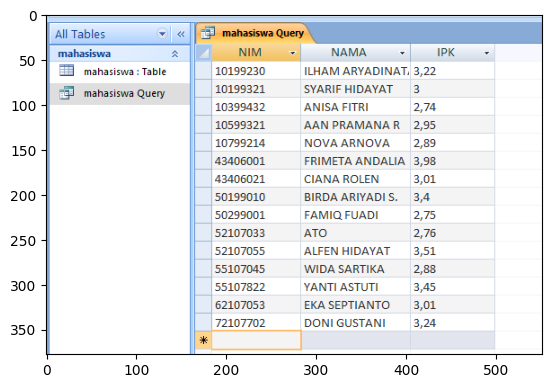

In [10]:
import fitz # modul PyMuPDf
import PIL.Image # Pillow
import matplotlib.pyplot as plt
import io

pdf = fitz.open('/content/BAB X [Membuat dan Memodifikasi Tabel].pdf')
counter = 1
for i in range(len(pdf)):
  page = pdf[i]
  images = page.get_images()
  for image in images :
    base_img = pdf.extract_image(image[0])
    image_data = base_img['image']
    img = PIL.Image.open(io.BytesIO(image_data))
    extantion = base_img['ext']
    img.save(open(f'image{counter}.{extantion}', 'wb'))
    counter+=1

    # menampilkan contoh dari hasil kodingan
    plt.imshow(img)



## Extract Table for File PDF

In [17]:
import tabula
import jpype
import pandas as pd
tabels = tabula.read_pdf('/content/Companies.pdf', pages = 'all')
df = tabels[0]
print(df)

    Rank                      Name                            Industry
0      1                   Walmart                              Retail
1      2                    Amazon          Retail and cloud computing
2      3                ExxonMobil                  Petroleum industry
3      4                     Apple                Electronics industry
4      5        UnitedHealth Group                          Healthcare
5      6                CVS Health                          Healthcare
6      7        Berkshire Hathaway                        Conglomerate
7      8                  Alphabet      Technology and Cloud Computing
8      9      McKesson Corporation                              Health
9     10       Chevron Corporation                  Petroleum industry
10    11         AmerisourceBergen             Pharmaceutical industry
11    12                    Costco                              Retail
12    13                 Microsoft      Technology and Cloud Computing
13    

In [18]:
# cross cek
print(df[df.Name == 'Humana'])

    Rank    Name          Industry
41    42  Humana  Health Insurance
